<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/22%EC%9E%A5/22%EC%9E%A5(%EA%B2%BD%EA%B3%84%EA%B0%92%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사격법, 예제 22.2

In [2]:
def dydx(x,y):
    T = y[0]  ; z = y[1]
    dy = np.zeros((2))
    dy[0] = z
    dy[1] = -0.05*(200.-T)
    return dy


In [4]:
import numpy as np
from scipy. integrate import solve_ivp
xi = 0. ; xf = 10.
xspan = np.linspace(xi,xf)
y0 = np.array([300.,-5.])
res = solve_ivp(dydx, (xi,xf),y0, t_eval=xspan)
t = res.t
T = res.y[0,: ]
n = len (t)
print ('Tb1 = {0:7.2f} K'.format (T[n-1]) )

Tb1 =  569.77 K


In [5]:
def dydx(x,y,hp,sigp,Tinf):
    T = y[0]  ; z = y[1]
    dy = np.zeros((2))
    dy[0] = z
    dy[1] = -hp*(Tinf-T) - sigp*(Tinf**4-T**4)
    return dy


In [6]:
def res(za,hp,sigp,L,Tinf,T0,TL):
    xi = 0. ; xf = L
    y0 = np.array([T0,za])
    result = solve_ivp(dydx,(xi,xf),y0,args=(hp,sigp,Tinf))
    n = len(result.t)
    return result.y[0,n-1]-TL

In [9]:
from scipy.optimize import brentq

L = 10  # m
hp = 0.05  # 1/m2
sigp = 2.7e-9  #  1/(K3*m2)
Tinf = 200.  # K
TL = 400.  # K
T0 = 300.  # K
za_soln = brentq(res,-10.,-100.,args=(hp,sigp,L,Tinf,T0,TL))
print('za = {0:7.2f} K/m'.format(za_soln))


za =  -41.74 K/m


도함수 경계조건

Text(0, 0.5, 'temperature - K')

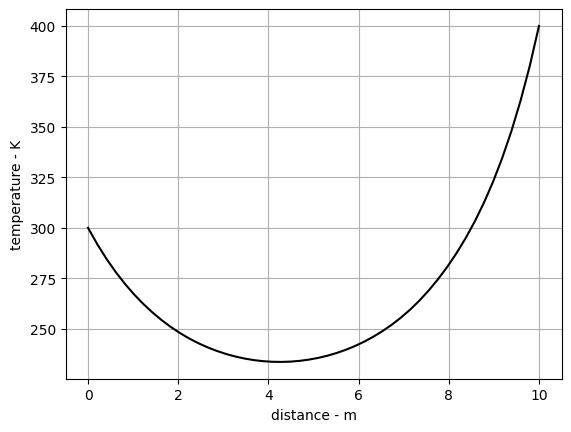

In [12]:
from scipy.integrate import solve_ivp
import pylab

xi = 0. ; xf = L
xspan = np.linspace(xi,xf)
y0 = np.array([T0,za_soln])
sol_out = solve_ivp(dydx,(xi,xf),y0,t_eval=xspan,args=(hp,sigp,Tinf))
x = sol_out.t
T = sol_out.y[0,:]
pylab.plot(x,T,c='k')
pylab.grid()
pylab.xlabel('distance - m')
pylab.ylabel('temperature - K')


In [15]:
def dydx(x,y):
    dy = []
    dy.append(y[1])
    dy.append(1.-y[0])
    return dy


In [17]:
def bc(ya,yb):
  return np.array([ya[0]-1,yb[0]])

Text(0, 0.5, 'y')

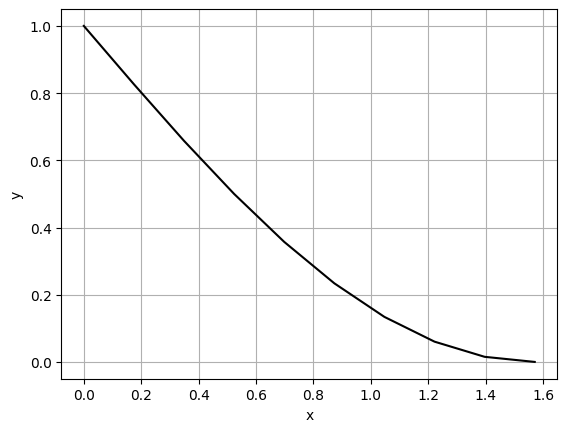

In [19]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
x = np.linspace(0.,np.pi/2,10)
y = np.zeros((2,10))
y[0,:] = 1 ; y[1,:] = -1
sol = solve_bvp(dydx,bc,x,y)
y = sol.y[0,:]
pylab.plot(x,y,c='k')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('y')